In [7]:
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluation metrics for K-Means:
Silhouette Score: 0.3552758654277684
Davies-Bouldin Index: 1.010597911905121
Calinski-Harabasz Index: 385.90139964208186


Evaluation metrics for Hierarchical:
Silhouette Score: 0.39956949276984105
Davies-Bouldin Index: 0.8851591359407941
Calinski-Harabasz Index: 355.6037862032244


Evaluation metrics for DBScan:
Silhouette Score: -0.07288314076931902
Davies-Bouldin Index: 2.3985591017098846
Calinski-Harabasz Index: 6.531478963269338


Evaluation metrics for Mean Shift:
Silhouette Score: 0.473360354875283
Davies-Bouldin Index: 0.8011656398740922
Calinski-Harabasz Index: 499.0902193394029




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


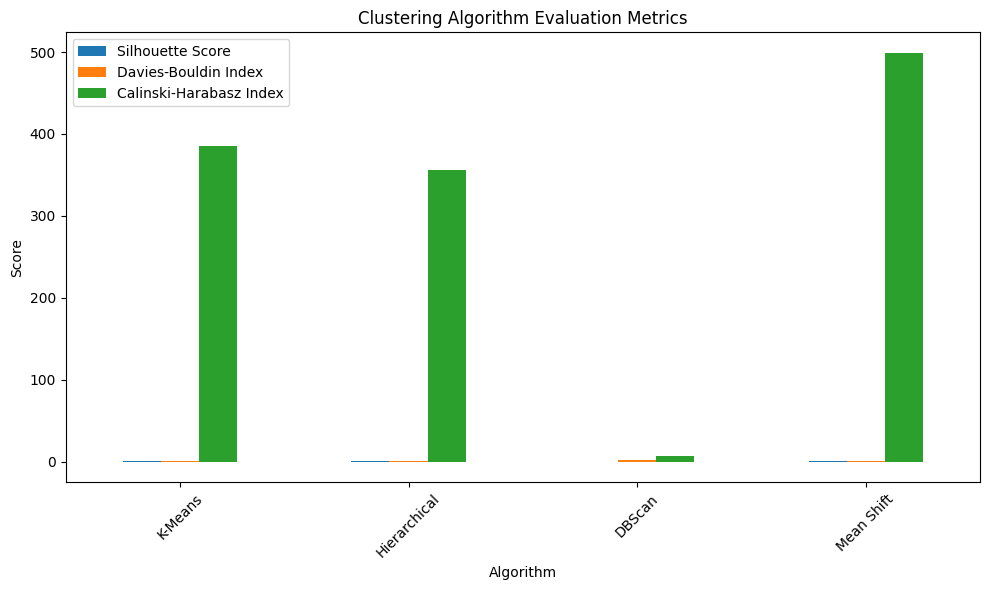

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

import io
data = pd.read_csv(io.BytesIO(data_to_load['data.csv']))
# data = pd.read_csv('C://User//manik//Downloads//data.csv')
data.head()

data = data.drop(columns=['S.NO'])
data.head()
# columns for clustering
X = data[['Days to 50% flowering', 'Leaf sheath length']].values


kmeans = KMeans(n_clusters=3, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.3, min_samples=5)
meanshift = MeanShift()

algorithms = [kmeans, hierarchical, dbscan, meanshift]
algorithm_names = ["K-Means", "Hierarchical", "DBScan", "Mean Shift"]

for algorithm, name in zip(algorithms, algorithm_names):

    if name != "Hierarchical":
        cluster_labels = algorithm.fit_predict(X)
    else:
        cluster_labels = algorithm.fit(X).labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(X, cluster_labels)

    # Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

    print(f"Evaluation metrics for {name}:")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print("\n")


# bar chart
metrics_dict = {
    "Algorithm": algorithm_names,
    "Silhouette Score": [silhouette_score(X, algorithm.fit_predict(X)) for algorithm in algorithms],
    "Davies-Bouldin Index": [davies_bouldin_score(X, algorithm.fit_predict(X)) for algorithm in algorithms],
    "Calinski-Harabasz Index": [calinski_harabasz_score(X, algorithm.fit_predict(X)) for algorithm in algorithms]
}

metrics_df = pd.DataFrame(metrics_dict)

# Plot
metrics_df.plot(x="Algorithm", kind="bar", figsize=(10, 6))
plt.title("Clustering Algorithm Evaluation Metrics")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()
plt.show()
